In [1]:
import geopandas as gpds
import networkx as nx
import time
import random
import matplotlib.pyplot as plt
import json

In [2]:
roads = gpds.read_file('data/sfo_roads.shp')
nodes = gpds.read_file('data/sfo_nodes.shp')

In [3]:
'''
Making shape to NetworkX shortest_path function input format
'''

Edges_Nx = []

for i in range(len(roads)):
    Edge_Nx = (roads.STARTID.iloc[i],roads.ENDID.iloc[i], {'weight':(roads.LENGTH.iloc[i])})
    Edges_Nx.append(Edge_Nx)
    
    
G = nx.Graph()
for i in range(len(roads)):
    G.add_node(i)
G.add_edges_from(Edges_Nx)

In [29]:
def Random_Dijkstra_NetworkX(OutputName):
    '''
    
    This function returns the nodes on the path with QGIS SQL query format.
    Also it generates the geojson output which contains the path nodes as point layer.
    
    '''
    Nodes = []

    # Random nodes selecting
    for i in range(len(nodes)):
        NodeId = str(int(nodes["ID"][i]))

        Nodes.append(NodeId)

    
    index_start = random.randint(0,len(nodes))
    index_finish = random.randint(0,len(nodes))

    Starting_Node = Nodes[index_start]
    Ending_Node = Nodes[index_finish]
    
    
    out_dict = {
    "type": "FeatureCollection",
    "name": OutputName,
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } },
    "features": [
    ]
    }

    
    try:
        NX_path = nx.shortest_path(G, source=int(Starting_Node), target=int(Ending_Node), weight='weight')
    
        NX_path_SQL = ""

        for j in range(len(NX_path)):
            query = (' "ID" = {} or '.format(NX_path[j]) )
    #           
            NX_path_SQL += query
        
        
        NX_path_SQL = NX_path_SQL[:-4]
        
        
        for i in range(len(NX_path)):
    
    

            X_coord = nodes[nodes["ID"] == NX_path[i]].geometry.item().x #["898840504"]
            Y_coord = nodes[nodes["ID"] == NX_path[i]].geometry.item().y



            point_feature = { "type": "Feature", "properties": { "ID": i }, "geometry": { "type": "Point", "coordinates": [ X_coord, Y_coord ] } }

            out_dict["features"].append(point_feature)
        
        
        OutputString = "result/{}.geojson".format(OutputName) 

        with open(OutputString, 'w') as file:
             file.write(json.dumps(out_dict))

    except:
        NX_path_SQL = "There is no path between {} and {}.".format(Starting_Node,Ending_Node)
        
        
    return NX_path_SQL

    

In [30]:
Random_Dijkstra_NetworkX("path")

' "ID" = 48517618 or  "ID" = 872527328 or  "ID" = 48517604 or  "ID" = 48517606 or  "ID" = 968086865 or  "ID" = 48517621 or  "ID" = 831704822 or  "ID" = 294172558 or  "ID" = 48517622 or  "ID" = 48517631 or  "ID" = 48517623 or  "ID" = 968096231 or  "ID" = 48517598 or  "ID" = 48517597 or  "ID" = 48517593 or  "ID" = 48517594 or  "ID" = 831711352 or  "ID" = 48518197 or  "ID" = 831711353 or  "ID" = 831711354 or  "ID" = 48517777 or  "ID" = 48517779 or  "ID" = 48517833 or  "ID" = 48517838 or  "ID" = 48517842 or  "ID" = 851340376 or  "ID" = 968094337 or  "ID" = 48517818 or  "ID" = 833502827 or  "ID" = 833502825 or  "ID" = 48517826 or  "ID" = 833502826 or  "ID" = 886138433 or  "ID" = 48518103 or  "ID" = 833860191 or  "ID" = 48518102 or  "ID" = 946660263 or  "ID" = 851340370 or  "ID" = 816461752 or  "ID" = 851340369 or  "ID" = 48518003 or  "ID" = 884014328 or  "ID" = 832630362 or  "ID" = 946660264 or  "ID" = 48518012 or  "ID" = 48518065 or  "ID" = 832632752 or  "ID" = 48518067 or  "ID" = 48518068

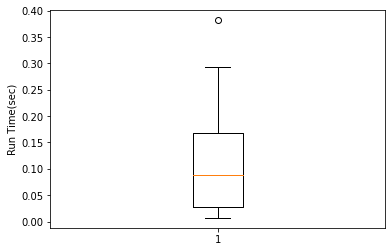

The maximum time sequence for 50093849 node to 847345841 node path.
The minimum time sequence for 48508171 node to 48520260 node path.
these two files have been added to the result folder as .geojson format


In [32]:
'''
This cell select N start and finish node. 
It generates two shapefile for one of them is minimum time cost path the other one is maximum time cost weight.

'''


N = 30

Nodes = []

# Random nodes selecting
for i in range(len(nodes)):
    NodeId = str(int(nodes["ID"][i]))

    Nodes.append(NodeId)

Random_Edges_Dijkstra_Start = []
Random_Edges_Dijkstra_Finish = []

for i in range(N):
    index_start = random.randint(0,len(nodes))
    index_finish = random.randint(0,len(nodes))

    Random_Edges_Dijkstra_Start.append(Nodes[index_start])
    Random_Edges_Dijkstra_Finish.append(Nodes[index_finish])
    
Time_List = []
min_time = 999999999999999999999999999
min_path = []
max_time = 0

Count_No_path = 0

for i in range (len(Random_Edges_Dijkstra_Start)):
    
    try:
        Start_Nx = time.time()
        NX_path = nx.shortest_path(G, source=int(Random_Edges_Dijkstra_Start[i]), target=int(Random_Edges_Dijkstra_Finish[(i)]), weight='weight')
        Finish_Nx = time.time()
        Diff_Nx = Finish_Nx - Start_Nx

        Time_List.append(Diff_Nx)
        
        

        if (Diff_Nx < min_time):
            min_time = Diff_Nx
            min_path = NX_path
        
        if (Diff_Nx > max_time):
            max_time = Diff_Nx
            max_path = NX_path
            
            
    except:
        Count_No_path += 1



## Generating the geojson files for max and min path



# Generating the max path

out_dict_max = {
"type": "FeatureCollection",
"name": "Max_Path",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } },
"features": []
}

for i in range(len(max_path)):
    
    X_coord = nodes[nodes["ID"] == max_path[i]].geometry.item().x 
    Y_coord = nodes[nodes["ID"] == max_path[i]].geometry.item().y

    point_feature = { "type": "Feature", "properties": { "ID": i }, "geometry": { "type": "Point", "coordinates": [ X_coord, Y_coord ] } }
    
    out_dict_max["features"].append(point_feature)
    


with open("result/max_path.geojson", 'w') as file:
    file.write(json.dumps(out_dict_max)) 
    
# Generating the min path

out_dict_min = {
"type": "FeatureCollection",
"name": "Min_Path",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::3857" } },
"features": []
}

for i in range(len(min_path)):
    
    X_coord = nodes[nodes["ID"] == min_path[i]].geometry.item().x 
    Y_coord = nodes[nodes["ID"] == min_path[i]].geometry.item().y

    point_feature = { "type": "Feature", "properties": { "ID": i }, "geometry": { "type": "Point", "coordinates": [ X_coord, Y_coord ] } }
    
    out_dict_min["features"].append(point_feature)
    


with open("result/min_path.geojson", 'w') as file:
    file.write(json.dumps(out_dict_min))


# Creating plot
plt.boxplot(Time_List)


plt.ylabel("Run Time(sec)")


# show plot
plt.show()


print("The maximum time sequence for {} node to {} node path.".format(max_path[0], max_path[-1]))
print("The minimum time sequence for {} node to {} node path.".format(min_path[0], min_path[-1]))
print("these two files have been added to the result folder as .geojson format")
